In [1]:
import numpy as np
from qiskit import Aer, execute, QuantumCircuit
from qiskit.compiler import transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
np.random.seed(0)
psi_init = np.random.rand(8)
psi_init = psi_init.reshape(-1, 1) / np.linalg.norm(psi_init)
print(psi_init)

[[0.31392474]
 [0.40909277]
 [0.3447844 ]
 [0.31167657]
 [0.24233318]
 [0.36945545]
 [0.25030261]
 [0.5100997 ]]


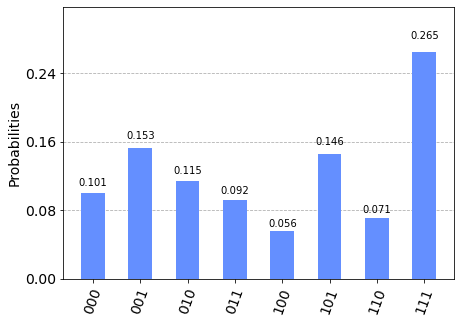

In [3]:
bitstrings = ['000', '001', '010', '011', '100', '101', '110', '111']

psi1 = QuantumCircuit(3)
psi1.initialize(Statevector(psi_init))
psi1.measure_all()

shots = 2000
sim = Aer.get_backend('aer_simulator')
qc_trans = transpile(psi1, sim)
counts = sim.run(qc_trans, shots=shots).result().get_counts()
probs = {}

plot_histogram(counts)

In [4]:
for output in bitstrings:
    if output in counts:
        probs[output] = counts[output]/shots
    else:
        probs[output] = 0

mean_x = 2*np.sum(np.array([np.sqrt(probs[output]) for output in ['000', '010', '100', '110']]))**2
mean_y = 2*np.sum(np.array([np.sqrt(probs[output]) for output in ['001', '011', '101', '111']]))**2
mean_x = np.sqrt(mean_x/32)
mean_y = np.sqrt(mean_y/32)

output_pairs_x = [['000', '010'], ['000', '100'], ['000', '110'], ['010', '100'], ['010', '110'], ['100', '110']]
output_pairs_y = [['001', '011'], ['001', '101'], ['001', '111'], ['011', '101'], ['011', '111'], ['101', '111']]

var_x = (1/2)*(np.sum(np.array([(np.sqrt(probs[output[0]])-np.sqrt(probs[output[1]]))**2 for output in output_pairs_x])))
var_y = (1/2)*(np.sum(np.array([(np.sqrt(probs[output[0]])-np.sqrt(probs[output[1]]))**2 for output in output_pairs_y])))
var_x = var_x/8
var_y = var_y/8

cov = 2*(np.sum(np.array([(np.sqrt(probs[output_pairs_x[i][0]])-np.sqrt(probs[output_pairs_x[i][1]]))*(np.sqrt(probs[output_pairs_y[i][0]])-np.sqrt(probs[output_pairs_y[i][1]])) for i in range(6)])))
cov = cov/32

print(mean_x)
print(mean_y)
print('\n')
print(var_x)
print(var_y)
print('\n')
print(cov)

0.2899751724319728
0.3982444265007875


0.0016643993730476485
0.005651376761058864


-0.0016455016694009858
